## Ensemble Model
----
#### Project Number 3

##### The classification goal is to predict if the client will subscribe (yes/no) a term deposit.

### 1 Importing the necessary libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="ticks", color_codes = True) 

from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier

In [2]:
## Reading File
bankData = pd.read_csv('bank-full.csv')
bankData.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome Target  
0  unknown    5   may       261         1     -1         0  unknown     no  
1  unknown    5   may       151         1     -1         0  unknown     no  
2  unknown    5   may        76         1     -1         0  unknown     no  
3  unknown    5   may        92         1     -1         0  unknown     no  
4  unknown    5   may       198         1     -1         0  unknown     no

In [3]:
## Shape of data
bankData.shape

(45211, 17)

## Shape of Data (45211) Rows and (17) Columns

In [4]:
## Find Null Values
bankData.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

## No Null or missing Values in Data

In [5]:
bankData.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
Target          2
dtype: int64

In [6]:
#sns.pairplot(bankData, diag_kind="kde")

In [7]:
# verify Columns
bankData.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

## Some comlums type is object eg. Target and Others which need to Convert

In [8]:
# Count Values of Target
bankData.Target.value_counts()

no     39922
yes     5289
Name: Target, dtype: int64

### Target is Object need to convert Num Values 

In [9]:
bankData['Target_bin'] = bankData.Target.map({'no':0, 'yes':1})

In [10]:
bankData.Target.value_counts()

no     39922
yes     5289
Name: Target, dtype: int64

In [11]:
bankData.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome Target  \
0  unknown    5   may       261         1     -1         0  unknown     no   
1  unknown    5   may       151         1     -1         0  unknown     no   
2  unknown    5   may        76         1     -1         0  unknown     no   
3  unknown    5   may        92         1     -1         0  unknown     no   
4  unknown    5   may       198         1     -1         0  unknown     no   

   Target_bin  
0           0  
1           0  
2           0  
3           0  
4           0

## Verify verious dataset impact to our Target

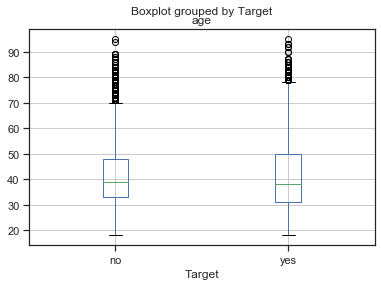

In [12]:
bankData.boxplot(column='age', by='Target')

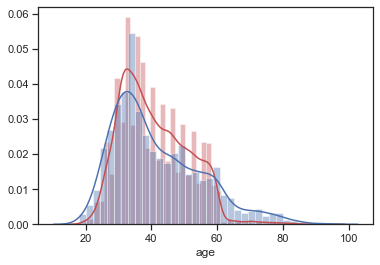

In [13]:
sns.distplot( bankData[bankData['Target_bin'] == 0]['age'], color = 'r')
sns.distplot( bankData[bankData['Target_bin'] == 1]['age'], color = 'b')

### Obeservation
Age as there are Outliers but people bitwin age group 30-40 has targeted most

In [14]:
bankData.groupby('job').Target_bin.agg(['count', 'mean']).sort_values('count')

count      mean
job                           
unknown          288  0.118056
student          938  0.286780
housemaid       1240  0.087903
unemployed      1303  0.155027
entrepreneur    1487  0.082717
self-employed   1579  0.118429
retired         2264  0.227915
services        4154  0.088830
admin.          5171  0.122027
technician      7597  0.110570
management      9458  0.137556
blue-collar     9732  0.072750

### Obeservation
Useful as values resolve arround same space

In [15]:
# Maritial status
bankData.groupby('marital').Target_bin.agg(['count', 'mean']).sort_values('count')

count      mean
marital                  
divorced   5207  0.119455
single    12790  0.149492
married   27214  0.101235

In [16]:
# Education
bankData.groupby('education').Target_bin.agg(['count', 'mean']).sort_values('count')

count      mean
education                 
unknown     1857  0.135703
primary     6851  0.086265
tertiary   13301  0.150064
secondary  23202  0.105594

In [17]:
# Default
bankData.groupby('default').Target_bin.agg(['count', 'mean']).sort_values('count')

count      mean
default                 
yes        815  0.063804
no       44396  0.117961

In [18]:
bankData['default'] = bankData.default.map({'no':0, 'yes':1})
bankData.default.value_counts()

0    44396
1      815
Name: default, dtype: int64

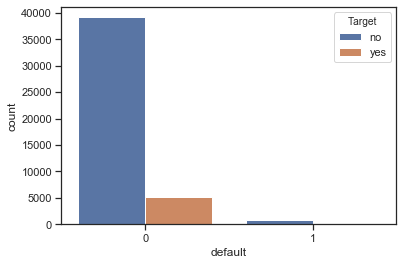

In [19]:
sns.countplot(x='default', hue='Target', data=bankData)

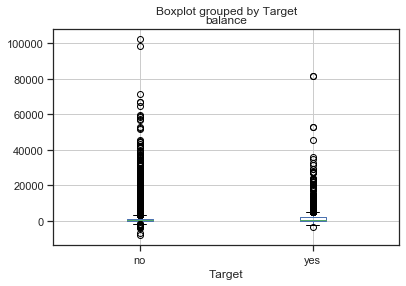

In [20]:
# Balance
bankData.boxplot(column='balance', by='Target')

In [21]:
# Housing
bankData.groupby('housing').Target_bin.agg(['count', 'mean']).sort_values('count')

count      mean
housing                 
no       20081  0.167024
yes      25130  0.077000

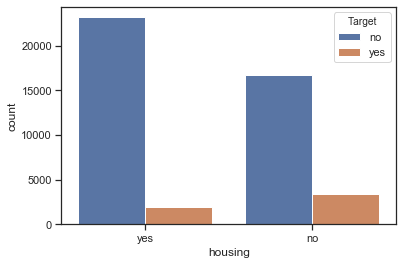

In [22]:
sns.countplot(x='housing', hue='Target', data=bankData)

In [23]:
# loan
bankData.groupby('loan').Target_bin.agg(['count', 'mean']).sort_values('count')

count      mean
loan                 
yes    7244  0.066814
no    37967  0.126557

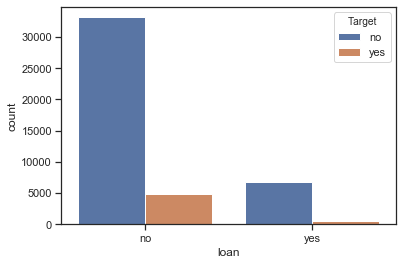

In [24]:
sns.countplot(x='loan', hue='Target', data=bankData)

In [25]:
# contact 
bankData.groupby('contact').Target_bin.agg(['count', 'mean']).sort_values('count')

count      mean
contact                   
telephone   2906  0.134205
unknown    13020  0.040707
cellular   29285  0.149189

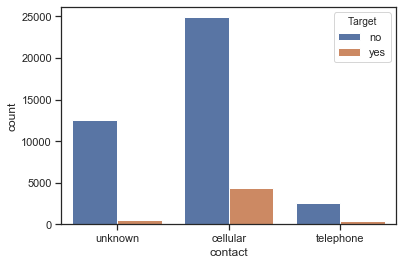

In [26]:
sns.countplot(x='contact', hue='Target', data=bankData)

     count      mean
day                 
1      322  0.279503
24     447  0.138702
10     524  0.230916
31     643  0.071540
25     840  0.158333
22     905  0.170166
23     939  0.134185
26    1035  0.112077
3     1079  0.164968
27    1121  0.133809
2     1293  0.140758
16    1415  0.135689
4     1445  0.159170
11    1479  0.122380
9     1561  0.114670
30    1566  0.173052
13    1585  0.152050
12    1603  0.152215
15    1703  0.139753
29    1745  0.073926
19    1757  0.069437
7     1817  0.086406
28    1830  0.078142
8     1842  0.109121
14    1848  0.113636
5     1910  0.112565
6     1932  0.093685
17    1939  0.090768
21    2026  0.099210
18    2308  0.098787
20    2752  0.069767
AxesSubplot(0.125,0.125;0.775x0.755)


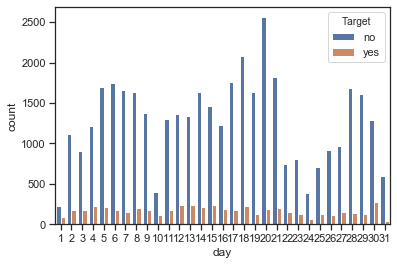

In [27]:
# Day
day = bankData.groupby('day').Target_bin.agg(['count', 'mean']).sort_values('count')
dayBox = sns.countplot(x='day', hue='Target', data=bankData)
print(day)
print(dayBox)

       count      mean
month                 
dec      214  0.467290
mar      477  0.519916
sep      579  0.464594
oct      738  0.437669
jan     1403  0.101212
feb     2649  0.166478
apr     2932  0.196794
nov     3970  0.101511
jun     5341  0.102228
aug     6247  0.110133
jul     6895  0.090935
may    13766  0.067195
AxesSubplot(0.125,0.125;0.775x0.755)


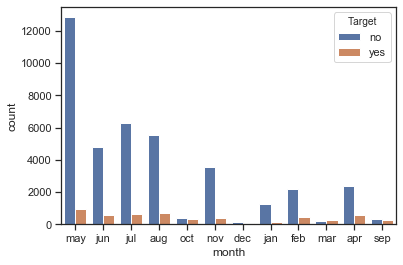

In [28]:
# month
month = bankData.groupby('month').Target_bin.agg(['count', 'mean']).sort_values('count')
monthplot = sns.countplot(x='month', hue='Target', data=bankData)
print(month)
print(monthplot)

In [29]:
#Convert Month into Numbers 
bankData['month'] = bankData.month.map({
    'jan':1,
    'feb':2,
    'mar':3,
    'apr':4,
    'may':5,
    'jun':6,
    'jul':7,
    'aug':8,
    'sep':9,
    'oct':10,
    'nov':11,
    'dec':12 })

          count      mean
duration                 
4918          1  0.000000
1342          1  1.000000
1343          1  1.000000
1345          1  1.000000
1347          1  1.000000
...         ...       ...
104         175  0.034286
122         175  0.040000
89          177  0.039548
90          184  0.016304
124         188  0.031915

[1573 rows x 2 columns]
AxesSubplot(0.1,0.15;0.8x0.75)


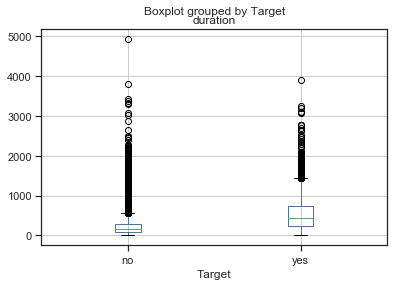

In [30]:
#duration 
duration = bankData.groupby('duration').Target_bin.agg(['count', 'mean']).sort_values('count')
durationplot = bankData.boxplot(column='duration', by='Target')
print(duration)
print(durationplot)

          count      mean
campaign                 
63            1  0.000000
39            1  0.000000
44            1  0.000000
46            1  0.000000
58            1  0.000000
51            1  0.000000
55            1  0.000000
41            2  0.000000
37            2  0.000000
50            2  0.000000
43            3  0.000000
38            3  0.000000
36            4  0.000000
35            4  0.000000
34            5  0.000000
33            6  0.000000
30            8  0.000000
32            9  0.111111
27           10  0.000000
31           12  0.000000
26           13  0.000000
29           16  0.062500
28           16  0.000000
24           20  0.050000
25           22  0.000000
23           22  0.000000
22           23  0.000000
21           35  0.028571
20           43  0.023256
19           44  0.000000
18           51  0.000000
17           69  0.086957
16           79  0.025316
15           84  0.047619
14           93  0.043011
13          133  0.045113
12          

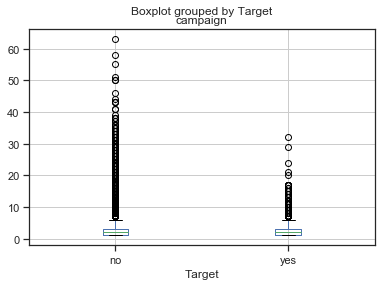

In [31]:
# campaign
campaign = bankData.groupby('campaign').Target_bin.agg(['count', 'mean']).sort_values('count')
campaignplot = bankData.boxplot(column='campaign', by='Target')
print(campaign)
print(campaignplot)

In [32]:
# pdays
bankData.groupby('pdays').Target_bin.agg(['count', 'mean']).sort_values('count')

count      mean
pdays                 
 871       1  0.000000
 419       1  0.000000
 592       1  0.000000
 589       1  0.000000
 420       1  1.000000
...      ...       ...
 183     126  0.507937
 91      126  0.595238
 92      147  0.653061
 182     167  0.479042
-1     36954  0.091573

[559 rows x 2 columns]

In [33]:
# Previous
bankData.groupby('previous').Target_bin.agg(['count', 'mean']).sort_values('count')

count      mean
previous                 
275           1  0.000000
32            1  0.000000
35            1  0.000000
40            1  0.000000
58            1  1.000000
51            1  0.000000
55            1  1.000000
41            1  0.000000
38            2  0.000000
37            2  0.000000
28            2  0.000000
26            2  0.500000
30            3  0.333333
21            4  0.250000
25            4  0.000000
29            4  0.250000
27            5  0.000000
24            5  0.000000
22            6  0.166667
18            6  0.000000
23            8  0.125000
20            8  0.125000
19           11  0.181818
16           13  0.000000
17           15  0.200000
14           19  0.263158
15           20  0.050000
13           38  0.236842
12           44  0.227273
11           65  0.230769
10           67  0.388060
9            92  0.260870
8           129  0.302326
7           205  0.263415
6           277  0.299639
5           459  0.263617
4           714  0.239496
3          1142  0.257443
2          2106  0.216524
1          2772  0.210317
0         36954  0.091573

In [34]:
#poutcome
bankData.groupby('poutcome').Target_bin.agg(['count', 'mean']).sort_values('count')

count      mean
poutcome                 
success    1511  0.647253
other      1840  0.166848
failure    4901  0.126097
unknown   36959  0.091615

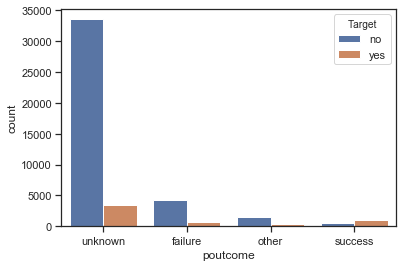

In [35]:
sns.countplot(x='poutcome', hue='Target', data=bankData)

### Correlation

In [36]:
bankData.corr()

age   default   balance       day     month  duration  \
age         1.000000 -0.017879  0.097783 -0.009120  0.092903 -0.004648   
default    -0.017879  1.000000 -0.066745  0.009424  0.014989 -0.010021   
balance     0.097783 -0.066745  1.000000  0.004503  0.094605  0.021560   
day        -0.009120  0.009424  0.004503  1.000000  0.101989 -0.030206   
month       0.092903  0.014989  0.094605  0.101989  1.000000 -0.011866   
duration   -0.004648 -0.010021  0.021560 -0.030206 -0.011866  1.000000   
campaign    0.004760  0.016822 -0.014578  0.162490  0.054868 -0.084570   
pdays      -0.023758 -0.029979  0.003435 -0.093044 -0.108940 -0.001565   
previous    0.001288 -0.018329  0.016674 -0.051710 -0.035600  0.001203   
Target_bin  0.025155 -0.022419  0.052838 -0.028348  0.018717  0.394521   

            campaign     pdays  previous  Target_bin  
age         0.004760 -0.023758  0.001288    0.025155  
default     0.016822 -0.029979 -0.018329   -0.022419  
balance    -0.014578  0.003435  0.016674    0.052838  
day         0.162490 -0.093044 -0.051710   -0.028348  
month       0.054868 -0.108940 -0.035600    0.018717  
duration   -0.084570 -0.001565  0.001203    0.394521  
campaign    1.000000 -0.088628 -0.032855   -0.073172  
pdays      -0.088628  1.000000  0.454820    0.103621  
previous   -0.032855  0.454820  1.000000    0.093236  
Target_bin -0.073172  0.103621  0.093236    1.000000

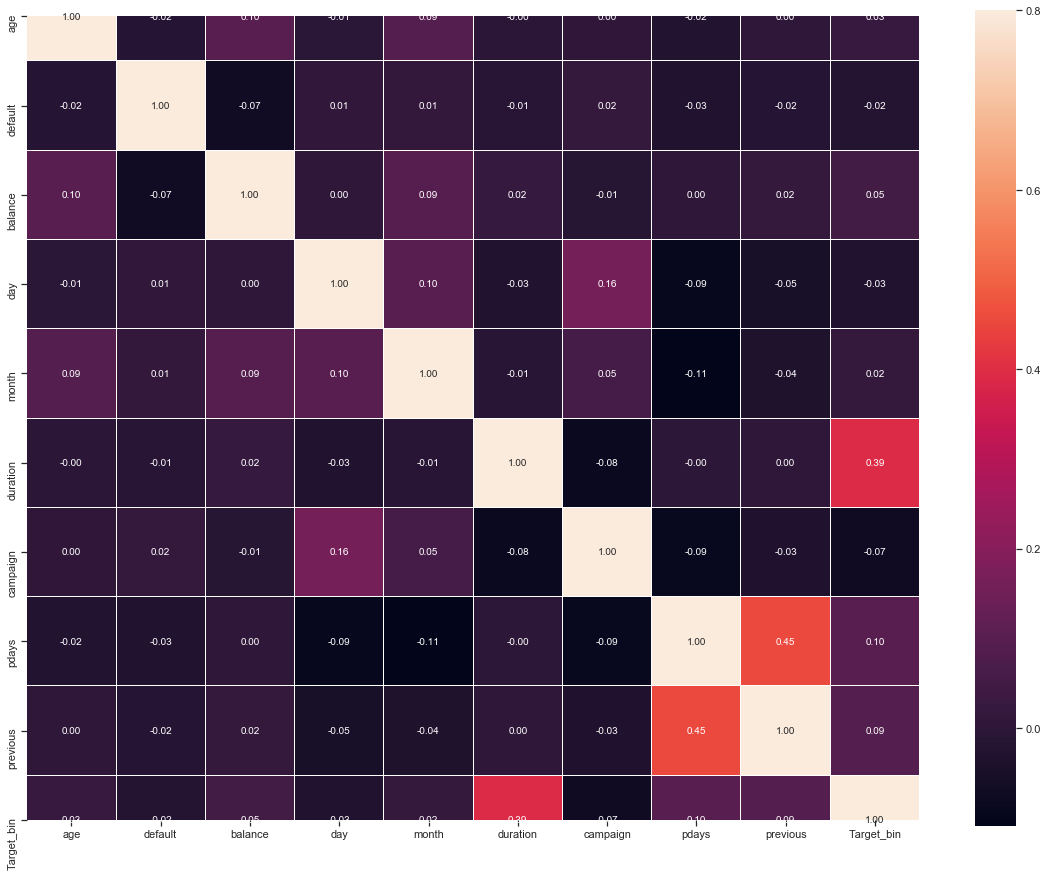

In [37]:
plt.subplots(figsize=(20,15))
sns.heatmap(bankData.corr(), vmax=.8, square=True, fmt='.2f', annot=True, linecolor='white', linewidths=0.01)

## Prepossing Data types

Some datatypes are not Int values using LabelEncoder Convert Data type to Int

In [38]:
bankData.dtypes

age            int64
job           object
marital       object
education     object
default        int64
balance        int64
housing       object
loan          object
contact       object
day            int64
month          int64
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
Target        object
Target_bin     int64
dtype: object

In [39]:
bank = bankData.copy()

In [40]:
le = LabelEncoder()
bank.job = le.fit_transform(bank.job)
bank.marital = le.fit_transform(bank.marital)
bank.education = le.fit_transform(bank.education)
bank.housing = le.fit_transform(bank.housing)
bank.loan = le.fit_transform(bank.loan)
bank.contact = le.fit_transform(bank.contact)
bank.poutcome = le.fit_transform(bank.poutcome)

## Split Data Set

In [41]:
bank = bank.drop('Target', axis=1)
bank.dtypes

age           int64
job           int32
marital       int32
education     int32
default       int64
balance       int64
housing       int32
loan          int32
contact       int32
day           int64
month         int64
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome      int32
Target_bin    int64
dtype: object

In [45]:
X=bank.drop('Target_bin', axis=1)
y=bank.loc[:,'Target_bin']
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=12)
X.shape,y.shape

((45211, 16), (45211,))

In [46]:
X_train.describe()

age           job       marital     education       default  \
count  31647.000000  31647.000000  31647.000000  31647.000000  31647.000000   
mean      40.957247      4.332923      1.167220      1.225013      0.018485   
std       10.625134      3.271868      0.607186      0.749195      0.134700   
min       18.000000      0.000000      0.000000      0.000000      0.000000   
25%       33.000000      1.000000      1.000000      1.000000      0.000000   
50%       39.000000      4.000000      1.000000      1.000000      0.000000   
75%       48.000000      7.000000      2.000000      2.000000      0.000000   
max       95.000000     11.000000      2.000000      3.000000      1.000000   

             balance       housing          loan       contact           day  \
count   31647.000000  31647.000000  31647.000000  31647.000000  31647.000000   
mean     1363.890258      0.555629      0.162132      0.644642     15.835466   
std      3028.304293      0.496904      0.368578      0.899480      8.337097   
min     -8019.000000      0.000000      0.000000      0.000000      1.000000   
25%        73.000000      0.000000      0.000000      0.000000      8.000000   
50%       450.000000      1.000000      0.000000      0.000000     16.000000   
75%      1431.000000      1.000000      0.000000      2.000000     21.000000   
max    102127.000000      1.000000      1.000000      2.000000     31.000000   

              month      duration      campaign         pdays      previous  \
count  31647.000000  31647.000000  31647.000000  31647.000000  31647.000000   
mean       6.146839    258.113534      2.765697     39.576042      0.574272   
std        2.406218    257.118973      3.113830     99.317592      2.422529   
min        1.000000      0.000000      1.000000     -1.000000      0.000000   
25%        5.000000    104.000000      1.000000     -1.000000      0.000000   
50%        6.000000    180.000000      2.000000     -1.000000      0.000000   
75%        8.000000    318.500000      3.000000     -1.000000      0.000000   
max       12.000000   4918.000000     63.000000    871.000000    275.000000   

           poutcome  
count  31647.000000  
mean       2.566152  
std        0.982069  
min        0.000000  
25%        3.000000  
50%        3.000000  
75%        3.000000  
max        3.000000

In [47]:
X_test.describe()

age           job       marital     education       default  \
count  13564.000000  13564.000000  13564.000000  13564.000000  13564.000000   
mean      40.887128      4.355721      1.168903      1.224344      0.016957   
std       10.604108      3.274561      0.610680      0.745224      0.129114   
min       18.000000      0.000000      0.000000      0.000000      0.000000   
25%       33.000000      1.000000      1.000000      1.000000      0.000000   
50%       39.000000      4.000000      1.000000      1.000000      0.000000   
75%       48.000000      7.000000      2.000000      2.000000      0.000000   
max       95.000000     11.000000      2.000000      3.000000      1.000000   

            balance       housing         loan       contact           day  \
count  13564.000000  13564.000000  13564.00000  13564.000000  13564.000000   
mean    1358.496535      0.556326      0.15578      0.629976     15.738646   
std     3082.940623      0.496836      0.36266      0.894322      8.288174   
min    -3313.000000      0.000000      0.00000      0.000000      1.000000   
25%       71.000000      0.000000      0.00000      0.000000      8.000000   
50%      445.000000      1.000000      0.00000      0.000000     16.000000   
75%     1413.250000      1.000000      0.00000      2.000000     21.000000   
max    98417.000000      1.000000      1.00000      2.000000     31.000000   

              month      duration      campaign         pdays      previous  \
count  13564.000000  13564.000000  13564.000000  13564.000000  13564.000000   
mean       6.139561    258.278679      2.759510     41.648555      0.594441   
std        2.412348    258.488648      3.060928    101.985178      1.998193   
min        1.000000      0.000000      1.000000     -1.000000      0.000000   
25%        5.000000    102.000000      1.000000     -1.000000      0.000000   
50%        6.000000    180.000000      2.000000     -1.000000      0.000000   
75%        8.000000    319.000000      3.000000     -1.000000      0.000000   
max       12.000000   3253.000000     58.000000    850.000000     55.000000   

           poutcome  
count  13564.000000  
mean       2.545562  
std        1.005069  
min        0.000000  
25%        3.000000  
50%        3.000000  
75%        3.000000  
max        3.000000

In [48]:
X_train.head()

age  job  marital  education  default  balance  housing  loan  contact  \
26109   56    0        1          3        0     1933        0     0        1   
40575   31   11        1          1        0        3        0     0        0   
15319   27    7        1          1        0      891        1     0        0   
43961   57    4        0          2        0     3287        0     0        0   
29841   31    9        1          1        0      119        1     0        0   

       day  month  duration  campaign  pdays  previous  poutcome  
26109   19     11        44         2     -1         0         3  
40575   20      7        91         2     -1         0         3  
15319   18      7       240         1     -1         0         3  
43961   22      6       867         1     84         3         2  
29841    4      2       380         1     -1         0         3

### Decision Tree Training

In [49]:
dct = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dct.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [50]:
dct_train = dct.score(X_train, y_train)
dct_test = dct.score(X_test, y_test)
cm = metrics.confusion_matrix(y_test, dct.predict(X_test))
print("Train Score : %.2f" %dct_train)
print("Test Score : %.2f" %dct_test)
print(cm)

Train Score : 1.00
Test Score : 0.88
[[11113   877]
 [  767   807]]


In [51]:
dct_Sensitivity = 807/(767+807)
print(dct_Sensitivity)

0.5127064803049556


### Used Max Depth 3 to reduse overfiting

In [52]:
dctR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dctR.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [53]:
dctR_train = dctR.score(X_train, y_train)
dctR_test = dctR.score(X_test, y_test)
cm = metrics.confusion_matrix(y_test, dctR.predict(X_test))
print("Train Score : %.2f" %dctR_train)
print("Test Score : %.2f" %dctR_test)
print(cm)

Train Score : 0.90
Test Score : 0.90
[[11719   271]
 [ 1123   451]]


In [54]:
dctR_Sensitivity = 451/(1123+451)
print(dctR_Sensitivity)

0.28653113087674714


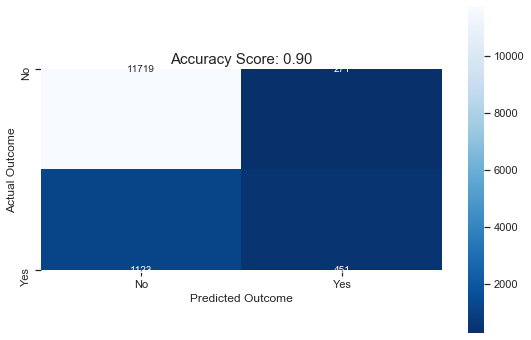

In [55]:
plt.figure(figsize=(9,6))
df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
sns.heatmap(df_cm, annot=True, fmt="g", square = True, cmap = 'Blues_r');
plt.ylabel('Actual Outcome');
plt.xlabel('Predicted Outcome');
all_sample_title = ('Accuracy Score: %.2f' %dctR_test)
plt.title(all_sample_title, size = 15);

## Ensemble - Bagging

In [56]:
bgcl = BaggingClassifier(base_estimator=dct, n_estimators=50,random_state=1)
bgcl = bgcl.fit(X_train, y_train)

In [57]:
bgcl_train = bgcl.score(X_train, y_train)
bgcl_test = bgcl.score(X_test, y_test)
cm = metrics.confusion_matrix(y_test, bgcl.predict(X_test))
print("Train Score : %.2f" %bgcl_train)
print("Test Score : %.2f" %bgcl_test)
print(cm)

Train Score : 1.00
Test Score : 0.90
[[11532   458]
 [  854   720]]


In [58]:
bgcl_Sensitivity = 720/(854+720)
print(bgcl_Sensitivity)

0.45743329097839897


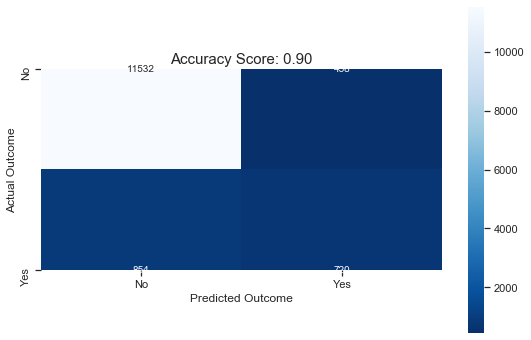

In [59]:
plt.figure(figsize=(9,6))
df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
sns.heatmap(df_cm, annot=True, fmt="g", square = True, cmap = 'Blues_r');
plt.ylabel('Actual Outcome');
plt.xlabel('Predicted Outcome');
all_sample_title = ('Accuracy Score: %.2f' %bgcl_test)
plt.title(all_sample_title, size = 15);

## Ensemble - AdaBoosting

In [60]:
abcl = AdaBoostClassifier(n_estimators=10, random_state=1)
abcl = abcl.fit(X_train, y_train)

In [61]:
abcl_train = abcl.score(X_train, y_train)
abcl_test = abcl.score(X_test, y_test)
cm = metrics.confusion_matrix(y_test, abcl.predict(X_test))
print("Train Score : %.2f" %abcl_train)
print("Test Score : %.2f" %abcl_test)
print(cm)

Train Score : 0.89
Test Score : 0.89
[[11568   422]
 [ 1101   473]]


In [62]:
abcl_Sensitivity = 473/(1101+473)
print(abcl_Sensitivity)

0.3005082592121982


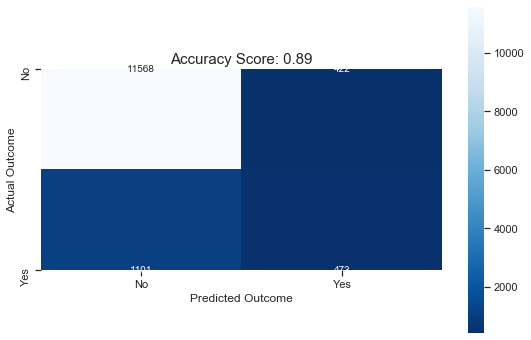

In [63]:
plt.figure(figsize=(9,6))
df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
sns.heatmap(df_cm, annot=True, fmt="g", square = True, cmap = 'Blues_r');
plt.ylabel('Actual Outcome');
plt.xlabel('Predicted Outcome');
all_sample_title = ('Accuracy Score: %.2f' %abcl_test)
plt.title(all_sample_title, size = 15);

## Ensemble - GradientBoost

In [64]:
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(X_train, y_train)

In [65]:
gbcl_train = gbcl.score(X_train, y_train)
gbcl_test = gbcl.score(X_test, y_test)
cm = metrics.confusion_matrix(y_test, gbcl.predict(X_test))
print("Train Score : %.2f" %gbcl_train)
print("Test Score : %.2f" %gbcl_test)
print(cm)

Train Score : 0.90
Test Score : 0.90
[[11722   268]
 [ 1055   519]]


In [66]:
gbcl_Sensitivity = 519/(1055+519)
print(gbcl_Sensitivity)

0.3297331639135959


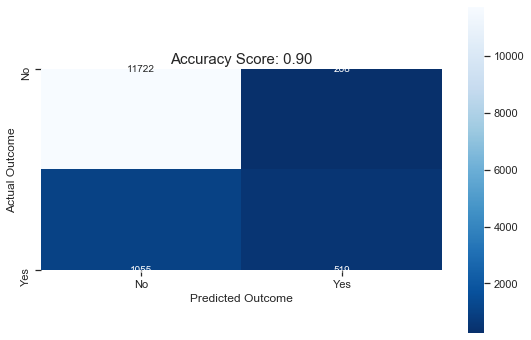

In [67]:
plt.figure(figsize=(9,6))
df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
sns.heatmap(df_cm, annot=True, fmt="g", square = True, cmap = 'Blues_r');
plt.ylabel('Actual Outcome');
plt.xlabel('Predicted Outcome');
all_sample_title = ('Accuracy Score: %.2f' %gbcl_test)
plt.title(all_sample_title, size = 15);

## Ensemble RandomForest Classifier

In [69]:
rfc = RandomForestClassifier(n_estimators=5, random_state=1, max_features=12)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=12, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [70]:
rfc_train = rfc.score(X_train, y_train)
rfc_test = rfc.score(X_test, y_test)
cm = metrics.confusion_matrix(y_test, rfc.predict(X_test),labels=[0, 1])
print("Train Score : %.2f" %rfc_train)
print("Test Score : %.2f" %rfc_test)
print(cm)

Train Score : 0.99
Test Score : 0.89
[[11373   617]
 [  817   757]]


In [71]:
rfc_Sensitivity = 757/(817+757)
print(rfc_Sensitivity)

0.4809402795425667


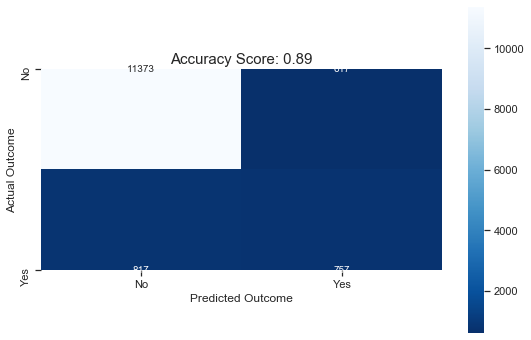

In [72]:
plt.figure(figsize=(9,6))
df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
sns.heatmap(df_cm, annot=True, fmt="g", square = True, cmap = 'Blues_r');
plt.ylabel('Actual Outcome');
plt.xlabel('Predicted Outcome');
all_sample_title = ('Accuracy Score: %.2f' %rfc_test)
plt.title(all_sample_title, size = 15);

## Comparision

In [73]:
comparision={'Accuracy' : [dct_test,dctR_test,bgcl_test,abcl_test,gbcl_test,rfc_test],
            'Sensitivity' : [dct_Sensitivity,dctR_Sensitivity,bgcl_Sensitivity,abcl_Sensitivity,gbcl_Sensitivity,rfc_Sensitivity]}
comparision = pd.DataFrame(comparision, index=['Decision Tree','Decision Tree Max3','Bagging','AdaBoost','GradientBoost', 'RandomForest'])
comparision

Accuracy  Sensitivity
Decision Tree       0.878797     0.512706
Decision Tree Max3  0.897228     0.286531
Bagging             0.903273     0.457433
AdaBoost            0.887717     0.300508
GradientBoost       0.902462     0.329733
RandomForest        0.894279     0.480940

Text(0.5, 1.0, 'Metrics Comparison')

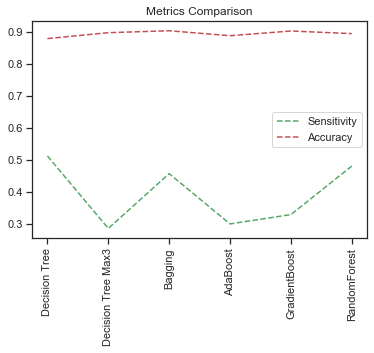

In [74]:
plt.plot(comparision.index,comparision.Sensitivity, 'g--', label='Sensitivity')
plt.plot(comparision.index,comparision.Accuracy, 'r--', label='Accuracy')
plt.xticks(rotation=90)
plt.legend()
plt.title("Metrics Comparison")

## Conclusion

**Decision Tree** By default do overfiting of data the best model can be used on data is **Bagging** or  **RandomForest** to predict customer can subscribe on marketing campaigns on Phone Call.